In [1]:
from pprint import pprint

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#from graph_tool import draw

import pybrite as pb

In [2]:
batch_size = 20
nodes_size_interval = (10, 15)
m_size_interval = (2, 2)

batch_generator = pb.graph_batch_generator(batch_size, nodes_size_interval, m_size_interval, input_fields=dict(node=("pos",)), global_field="pos")

In [3]:
for in_batch, tg_batch in batch_generator:
    p = 0
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        edge_solution = np.array([not f[2] for f in tg_graph.edges(data="solution")], np.bool)
        p += edge_solution[edge_solution].size / edge_solution.size
    print(p/batch_size)
    break

0.7383575007424785


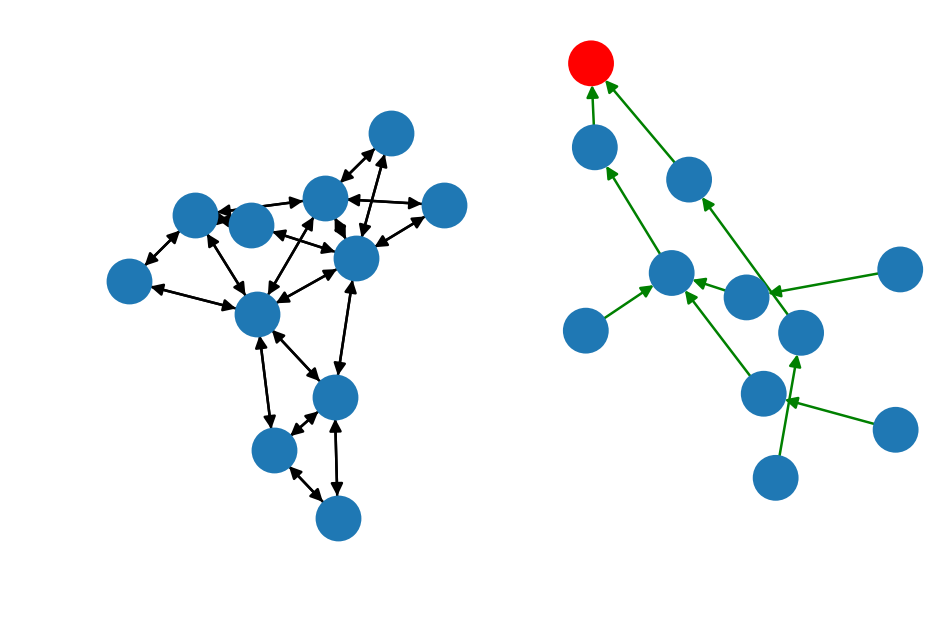

Features from Input
For Nodes:
{0: array([947., 662.]),
 1: array([ 19., 928.]),
 2: array([199., 294.]),
 3: array([283., 674.]),
 4: array([723., 311.]),
 5: array([934.,  95.]),
 6: array([736., 196.]),
 7: array([ 13., 916.]),
 8: array([414., 438.]),
 9: array([542., 738.]),
 10: array([662., 834.])}
For Edges:
[((0, 1), array([965.37])),
 ((0, 2), array([833.62])),
 ((0, 6), array([511.54])),
 ((0, 8), array([578.16])),
 ((1, 0), array([965.37])),
 ((1, 2), array([659.06])),
 ((1, 3), array([366.35])),
 ((1, 5), array([1237.38])),
 ((1, 7), array([13.42])),
 ((1, 10), array([649.83])),
 ((2, 0), array([833.62])),
 ((2, 1), array([659.06])),
 ((2, 3), array([389.17])),
 ((2, 4), array([524.28])),
 ((2, 6), array([545.87])),
 ((2, 9), array([561.06])),
 ((3, 2), array([389.17])),
 ((3, 1), array([366.35])),
 ((3, 4), array([570.41])),
 ((3, 7), array([362.58])),
 ((3, 10), array([411.39])),
 ((4, 3), array([570.41])),
 ((4, 2), array([524.28])),
 ((4, 5), array([301.96])),
 ((4, 9)

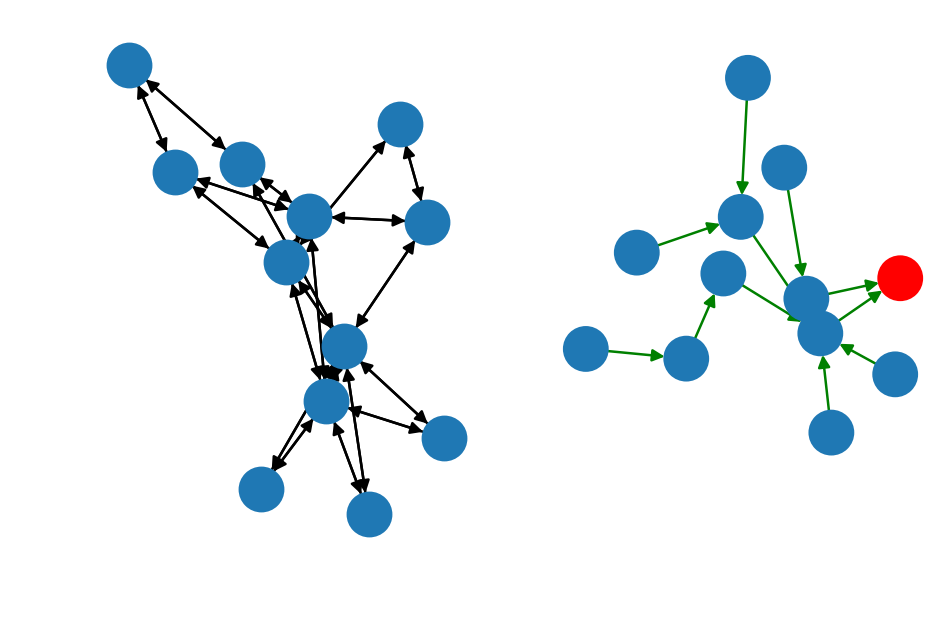

Features from Input
For Nodes:
{0: array([364., 582.]),
 1: array([599., 397.]),
 2: array([409., 798.]),
 3: array([ 32., 818.]),
 4: array([568., 495.]),
 5: array([876., 560.]),
 6: array([989.,  99.]),
 7: array([875., 471.]),
 8: array([639., 929.]),
 9: array([563., 374.]),
 10: array([616., 978.]),
 11: array([563., 105.])}
For Edges:
[((0, 1), array([299.08])),
 ((0, 2), array([220.64])),
 ((0, 3), array([407.33])),
 ((0, 5), array([512.47])),
 ((0, 9), array([287.86])),
 ((1, 0), array([299.08])),
 ((1, 2), array([443.74])),
 ((1, 5), array([321.4])),
 ((1, 7), array([285.75])),
 ((1, 8), array([533.5])),
 ((2, 0), array([220.64])),
 ((2, 1), array([443.74])),
 ((2, 3), array([377.53])),
 ((2, 4), array([342.18])),
 ((2, 6), array([908.3])),
 ((2, 10), array([274.32])),
 ((3, 2), array([377.53])),
 ((3, 0), array([407.33])),
 ((3, 4), array([625.8])),
 ((3, 6), array([1197.])),
 ((3, 7), array([911.62])),
 ((3, 8), array([617.07])),
 ((3, 10), array([605.52])),
 ((4, 3), array

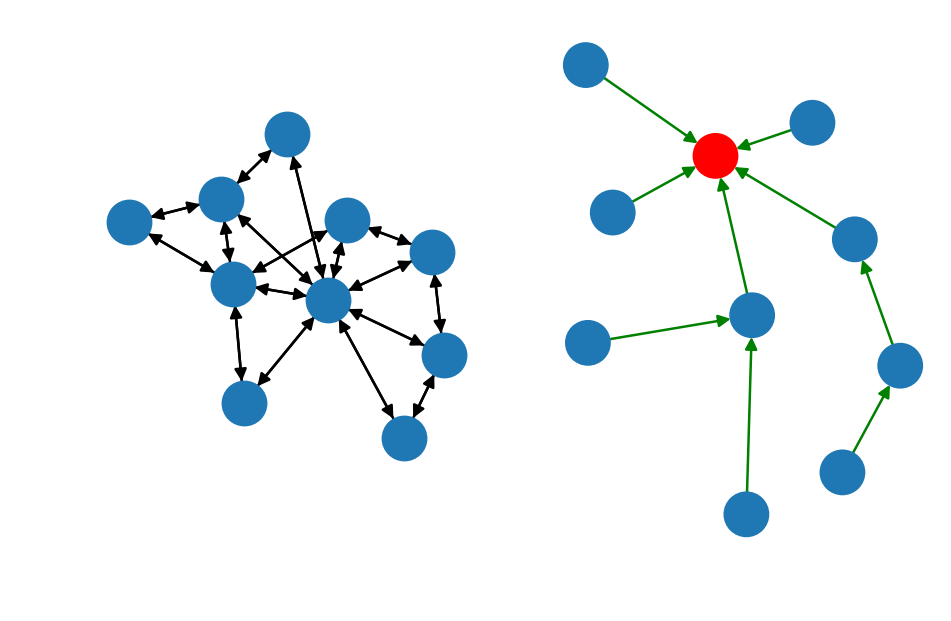

Features from Input
For Nodes:
{0: array([791., 383.]),
 1: array([964., 501.]),
 2: array([540., 507.]),
 3: array([689., 910.]),
 4: array([561., 553.]),
 5: array([622., 986.]),
 6: array([208., 173.]),
 7: array([816., 128.]),
 8: array([321., 464.]),
 9: array([580., 601.])}
For Edges:
[((0, 1), array([209.41])),
 ((0, 2), array([279.96])),
 ((0, 3), array([536.78])),
 ((0, 5), array([626.23])),
 ((0, 7), array([256.22])),
 ((1, 0), array([209.41])),
 ((1, 2), array([424.04])),
 ((1, 3), array([492.85])),
 ((1, 4), array([406.34])),
 ((1, 5), array([593.46])),
 ((1, 6), array([824.09])),
 ((1, 8), array([644.06])),
 ((1, 9), array([396.81])),
 ((2, 0), array([279.96])),
 ((2, 1), array([424.04])),
 ((2, 4), array([50.57])),
 ((3, 1), array([492.85])),
 ((3, 0), array([536.78])),
 ((3, 6), array([880.07])),
 ((3, 7), array([792.25])),
 ((4, 1), array([406.34])),
 ((4, 2), array([50.57])),
 ((4, 8), array([255.97])),
 ((5, 0), array([626.23])),
 ((5, 1), array([593.46])),
 ((6, 1), 

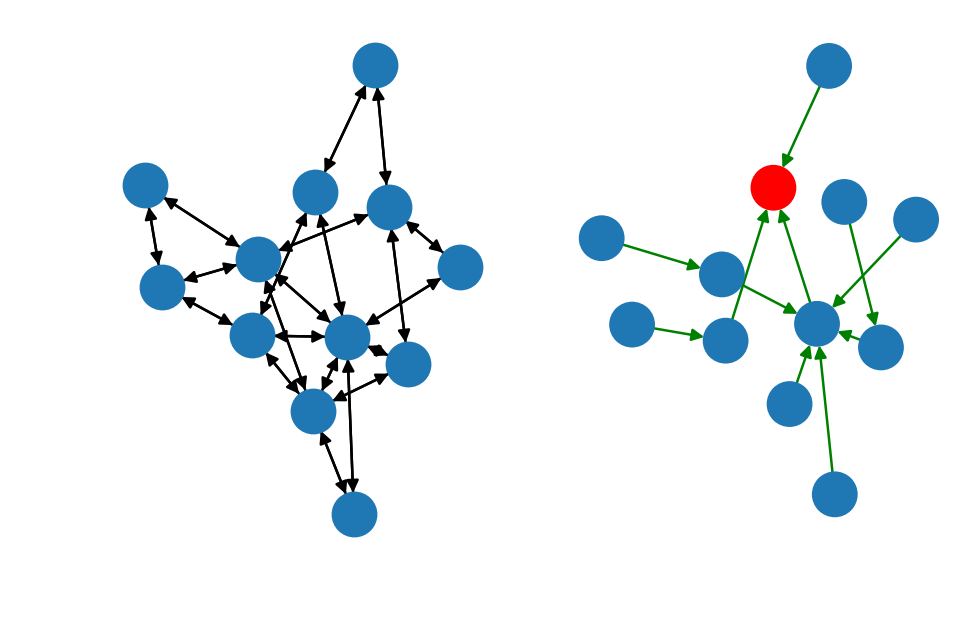

Features from Input
For Nodes:
{0: array([  2., 997.]),
 1: array([541., 567.]),
 2: array([ 59., 275.]),
 3: array([459., 393.]),
 4: array([191., 185.]),
 5: array([138., 105.]),
 6: array([469., 126.]),
 7: array([279., 991.]),
 8: array([967., 348.]),
 9: array([699., 566.]),
 10: array([647., 729.]),
 11: array([360., 402.])}
For Edges:
[((0, 1), array([689.51])),
 ((0, 2), array([724.25])),
 ((0, 3), array([757.41])),
 ((0, 5), array([902.31])),
 ((0, 11), array([694.4])),
 ((1, 0), array([689.51])),
 ((1, 2), array([563.55])),
 ((1, 6), array([446.84])),
 ((1, 7), array([498.42])),
 ((1, 8), array([479.])),
 ((2, 0), array([724.25])),
 ((2, 1), array([563.55])),
 ((2, 3), array([417.04])),
 ((2, 4), array([159.76])),
 ((2, 5), array([187.46])),
 ((2, 9), array([703.05])),
 ((2, 11), array([326.7])),
 ((3, 0), array([757.41])),
 ((3, 2), array([417.04])),
 ((3, 4), array([339.25])),
 ((3, 7), array([624.5])),
 ((4, 2), array([159.76])),
 ((4, 3), array([339.25])),
 ((4, 10), arra

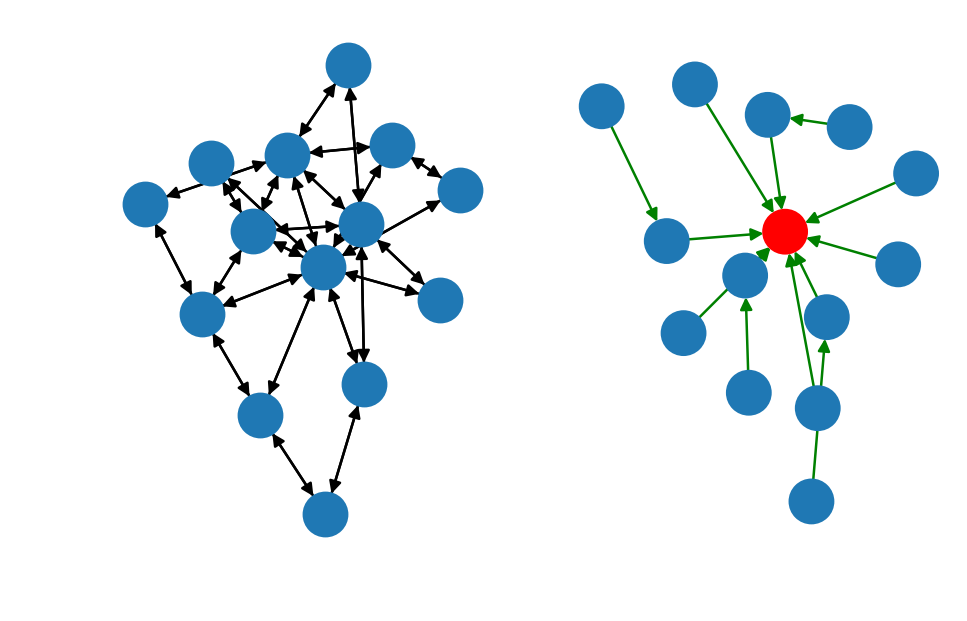

Features from Input
For Nodes:
{0: array([ 33., 212.]),
 1: array([ 88., 219.]),
 2: array([936.,  77.]),
 3: array([293., 889.]),
 4: array([360., 547.]),
 5: array([194., 223.]),
 6: array([746., 789.]),
 7: array([931., 998.]),
 8: array([430., 701.]),
 9: array([967., 519.]),
 10: array([520., 123.]),
 11: array([592., 961.]),
 12: array([466., 752.]),
 13: array([454.,  32.])}
For Edges:
[((0, 1), array([55.44])),
 ((0, 2), array([913.04])),
 ((0, 4), array([468.14])),
 ((0, 5), array([161.38])),
 ((0, 6), array([917.22])),
 ((0, 7), array([1193.4])),
 ((0, 9), array([983.16])),
 ((0, 11), array([934.6])),
 ((0, 13), array([457.87])),
 ((1, 0), array([55.44])),
 ((1, 2), array([859.81])),
 ((1, 3), array([700.66])),
 ((1, 5), array([106.08])),
 ((1, 7), array([1147.82])),
 ((2, 0), array([913.04])),
 ((2, 1), array([859.81])),
 ((2, 3), array([1035.76])),
 ((2, 6), array([736.92])),
 ((2, 8), array([803.38])),
 ((2, 10), array([418.54])),
 ((3, 1), array([700.66])),
 ((3, 2), arra

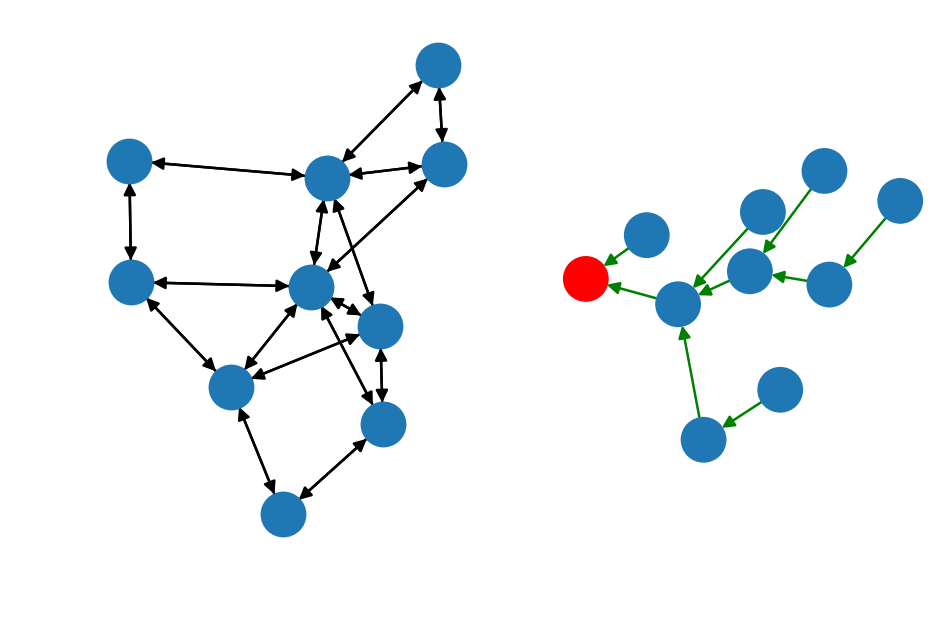

Features from Input
For Nodes:
{0: array([339., 603.]),
 1: array([168., 527.]),
 2: array([919., 789.]),
 3: array([594., 565.]),
 4: array([ 67., 553.]),
 5: array([648., 710.]),
 6: array([738., 235.]),
 7: array([830., 431.]),
 8: array([344., 566.]),
 9: array([639.,  96.])}
For Edges:
[((0, 1), array([187.13])),
 ((0, 2), array([609.09])),
 ((0, 5), array([327.])),
 ((0, 8), array([37.34])),
 ((0, 9), array([589.11])),
 ((1, 0), array([187.13])),
 ((1, 2), array([795.39])),
 ((1, 3), array([427.69])),
 ((1, 4), array([104.29])),
 ((1, 5), array([513.7])),
 ((1, 6), array([640.44])),
 ((2, 0), array([609.09])),
 ((2, 1), array([795.39])),
 ((2, 3), array([394.72])),
 ((2, 4), array([884.08])),
 ((3, 2), array([394.72])),
 ((3, 1), array([427.69])),
 ((3, 6), array([360.05])),
 ((3, 7), array([271.39])),
 ((4, 2), array([884.08])),
 ((4, 1), array([104.29])),
 ((4, 7), array([772.69])),
 ((5, 1), array([513.7])),
 ((5, 0), array([327.])),
 ((5, 9), array([614.07])),
 ((6, 1), array

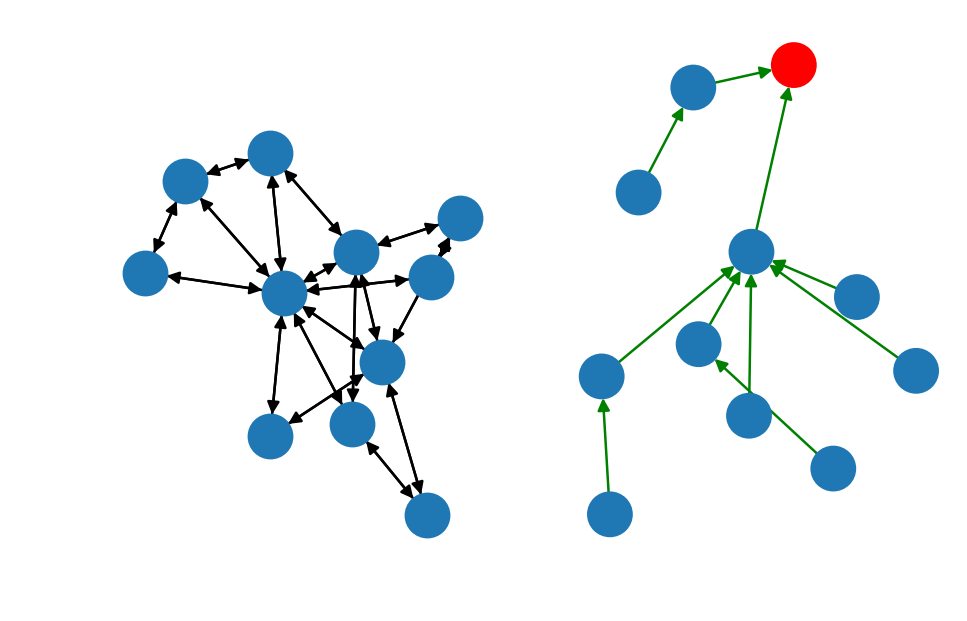

Features from Input
For Nodes:
{0: array([772., 445.]),
 1: array([711., 693.]),
 2: array([173.,  79.]),
 3: array([807., 103.]),
 4: array([960.,  57.]),
 5: array([511., 863.]),
 6: array([336., 774.]),
 7: array([842.,  39.]),
 8: array([879., 664.]),
 9: array([580.,  58.]),
 10: array([388., 499.])}
For Edges:
[((0, 1), array([255.39])),
 ((0, 2), array([701.97])),
 ((0, 4), array([431.15])),
 ((0, 5), array([492.79])),
 ((0, 7), array([411.99])),
 ((1, 0), array([255.39])),
 ((1, 2), array([816.36])),
 ((1, 3), array([597.76])),
 ((1, 4), array([683.01])),
 ((1, 5), array([262.49])),
 ((1, 8), array([170.48])),
 ((1, 9), array([648.37])),
 ((1, 10), array([376.78])),
 ((2, 0), array([701.97])),
 ((2, 1), array([816.36])),
 ((2, 3), array([634.45])),
 ((2, 6), array([713.86])),
 ((2, 7), array([670.19])),
 ((3, 1), array([597.76])),
 ((3, 2), array([634.45])),
 ((4, 1), array([683.01])),
 ((4, 0), array([431.15])),
 ((4, 8), array([612.38])),
 ((5, 0), array([492.79])),
 ((5, 1),

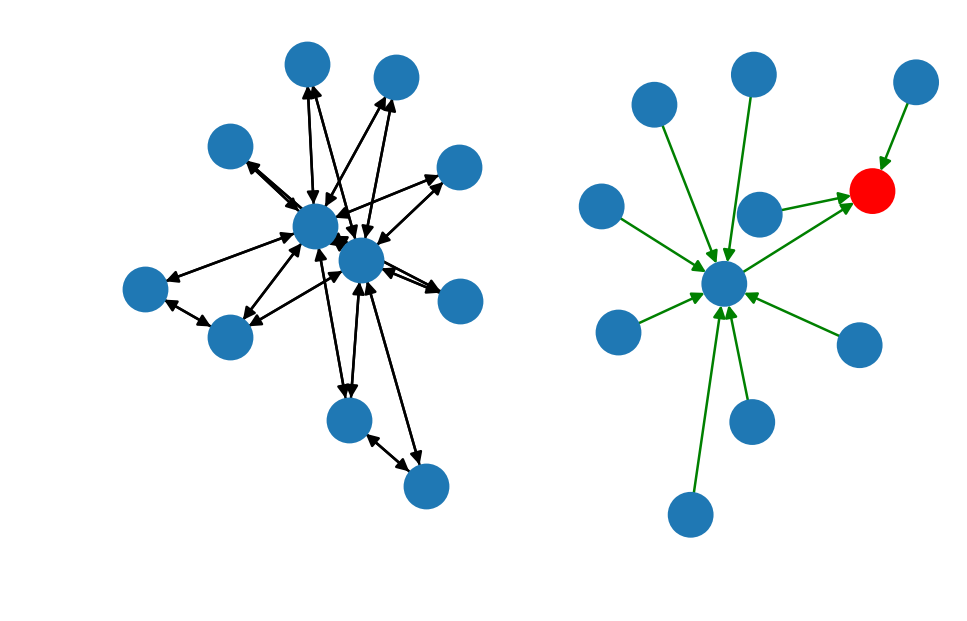

Features from Input
For Nodes:
{0: array([435., 889.]),
 1: array([573., 450.]),
 2: array([531., 893.]),
 3: array([486., 747.]),
 4: array([991., 511.]),
 5: array([544., 349.]),
 6: array([647., 842.]),
 7: array([932., 506.]),
 8: array([248., 315.]),
 9: array([245., 149.]),
 10: array([849., 419.])}
For Edges:
[((0, 1), array([460.18])),
 ((0, 2), array([96.08])),
 ((1, 0), array([460.18])),
 ((1, 2), array([444.99])),
 ((1, 3), array([309.48])),
 ((1, 4), array([422.43])),
 ((1, 5), array([105.08])),
 ((1, 6), array([398.92])),
 ((1, 7), array([363.34])),
 ((1, 8), array([351.92])),
 ((1, 9), array([445.18])),
 ((2, 0), array([96.08])),
 ((2, 1), array([444.99])),
 ((2, 3), array([152.78])),
 ((2, 4), array([597.93])),
 ((2, 5), array([544.16])),
 ((2, 6), array([126.72])),
 ((2, 7), array([557.29])),
 ((2, 8), array([643.56])),
 ((2, 10), array([570.79])),
 ((3, 2), array([152.78])),
 ((3, 1), array([309.48])),
 ((4, 2), array([597.93])),
 ((4, 1), array([422.43])),
 ((5, 1), a

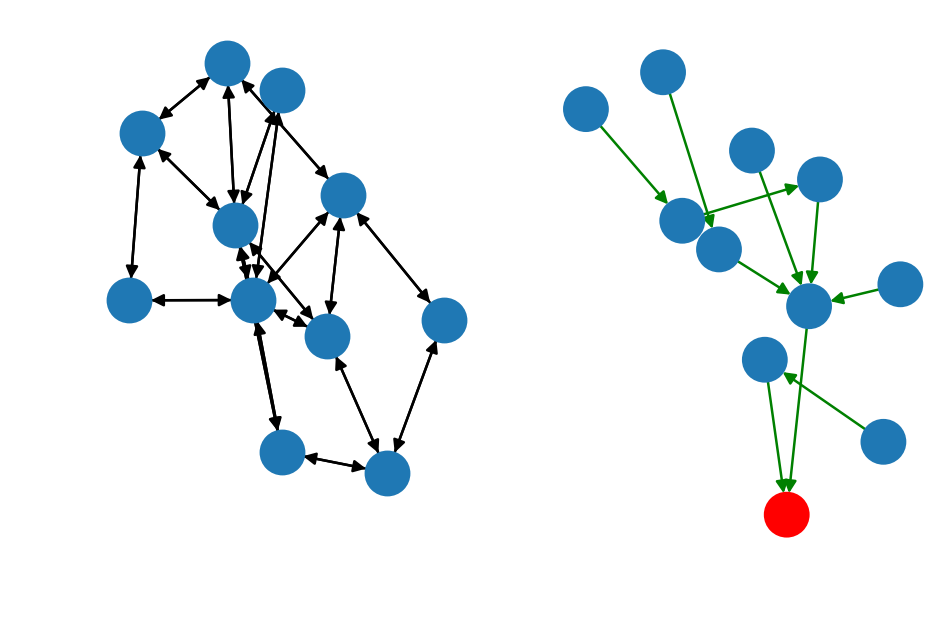

Features from Input
For Nodes:
{0: array([859., 493.]),
 1: array([796., 570.]),
 2: array([395., 718.]),
 3: array([353., 276.]),
 4: array([166., 321.]),
 5: array([476., 202.]),
 6: array([981., 167.]),
 7: array([736., 234.]),
 8: array([442., 196.]),
 9: array([  6., 296.]),
 10: array([847., 377.])}
For Edges:
[((0, 1), array([99.49])),
 ((0, 2), array([515.68])),
 ((1, 0), array([99.49])),
 ((1, 2), array([427.44])),
 ((1, 3), array([531.68])),
 ((1, 4), array([677.42])),
 ((1, 7), array([341.32])),
 ((1, 9), array([836.17])),
 ((2, 0), array([515.68])),
 ((2, 1), array([427.44])),
 ((2, 3), array([443.99])),
 ((2, 4), array([458.31])),
 ((2, 5), array([522.32])),
 ((2, 10), array([566.2])),
 ((3, 1), array([531.68])),
 ((3, 2), array([443.99])),
 ((3, 5), array([143.54])),
 ((3, 6), array([637.39])),
 ((4, 2), array([458.31])),
 ((4, 1), array([677.42])),
 ((4, 6), array([829.42])),
 ((5, 3), array([143.54])),
 ((5, 2), array([522.32])),
 ((5, 7), array([261.96])),
 ((5, 8), ar

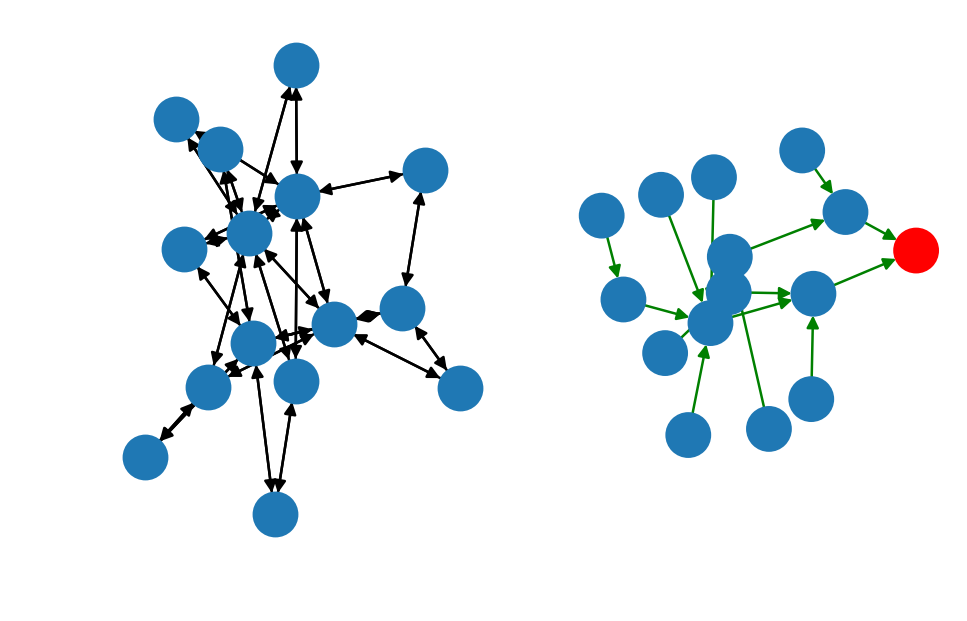

Features from Input
For Nodes:
{0: array([446., 369.]),
 1: array([334.,  80.]),
 2: array([791., 579.]),
 3: array([364., 742.]),
 4: array([918., 452.]),
 5: array([533.,  94.]),
 6: array([744., 805.]),
 7: array([813., 396.]),
 8: array([398., 488.]),
 9: array([316., 143.]),
 10: array([136., 342.]),
 11: array([717., 454.]),
 12: array([215., 591.]),
 13: array([367., 326.]),
 14: array([941., 228.])}
For Edges:
[((0, 1), array([309.94])),
 ((0, 2), array([403.89])),
 ((0, 3), array([381.91])),
 ((0, 4), array([479.24])),
 ((0, 5), array([288.43])),
 ((0, 10), array([311.17])),
 ((0, 11), array([284.02])),
 ((1, 0), array([309.94])),
 ((1, 2), array([676.65])),
 ((1, 6), array([832.9])),
 ((2, 0), array([403.89])),
 ((2, 1), array([676.65])),
 ((2, 3), array([457.05])),
 ((2, 4), array([179.61])),
 ((2, 5), array([549.35])),
 ((2, 9), array([644.76])),
 ((2, 11), array([145.26])),
 ((2, 13), array([493.75])),
 ((3, 2), array([457.05])),
 ((3, 0), array([381.91])),
 ((4, 2), array

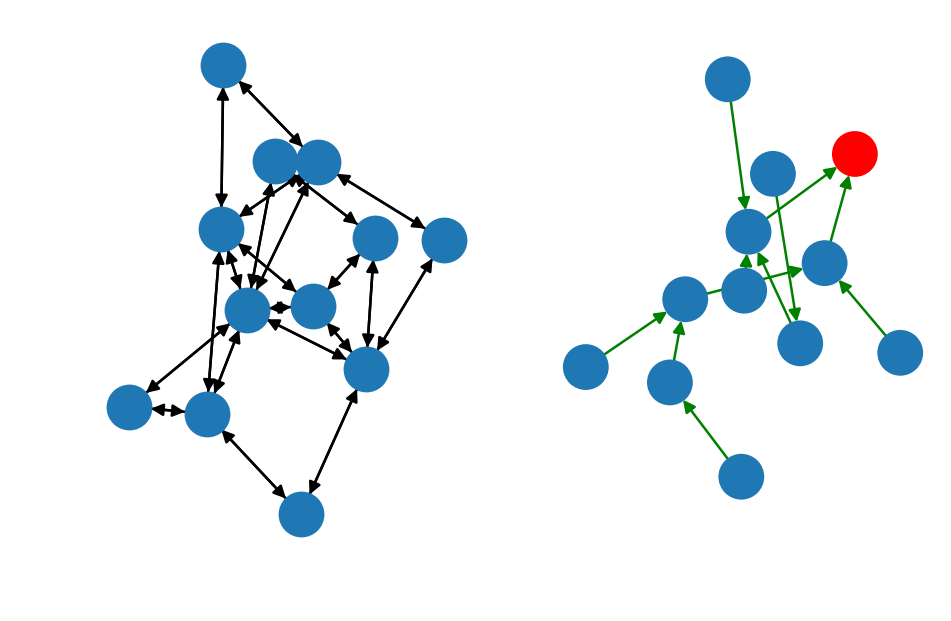

Features from Input
For Nodes:
{0: array([596.,  16.]),
 1: array([761., 183.]),
 2: array([418., 760.]),
 3: array([881., 637.]),
 4: array([274., 742.]),
 5: array([647., 306.]),
 6: array([119., 830.]),
 7: array([382., 991.]),
 8: array([160., 856.]),
 9: array([571., 904.]),
 10: array([420., 757.]),
 11: array([964., 930.])}
For Edges:
[((0, 1), array([234.76])),
 ((0, 2), array([765.])),
 ((0, 5), array([294.45])),
 ((0, 10), array([761.61])),
 ((1, 0), array([234.76])),
 ((1, 2), array([671.25])),
 ((1, 3), array([469.59])),
 ((1, 4), array([741.38])),
 ((1, 5), array([167.71])),
 ((1, 7), array([892.47])),
 ((1, 11), array([774.09])),
 ((2, 0), array([765.])),
 ((2, 1), array([671.25])),
 ((2, 3), array([479.06])),
 ((2, 4), array([145.12])),
 ((2, 6), array([307.08])),
 ((3, 1), array([469.59])),
 ((3, 2), array([479.06])),
 ((3, 6), array([786.06])),
 ((3, 8), array([753.53])),
 ((4, 1), array([741.38])),
 ((4, 2), array([145.12])),
 ((4, 7), array([271.41])),
 ((4, 9), arra

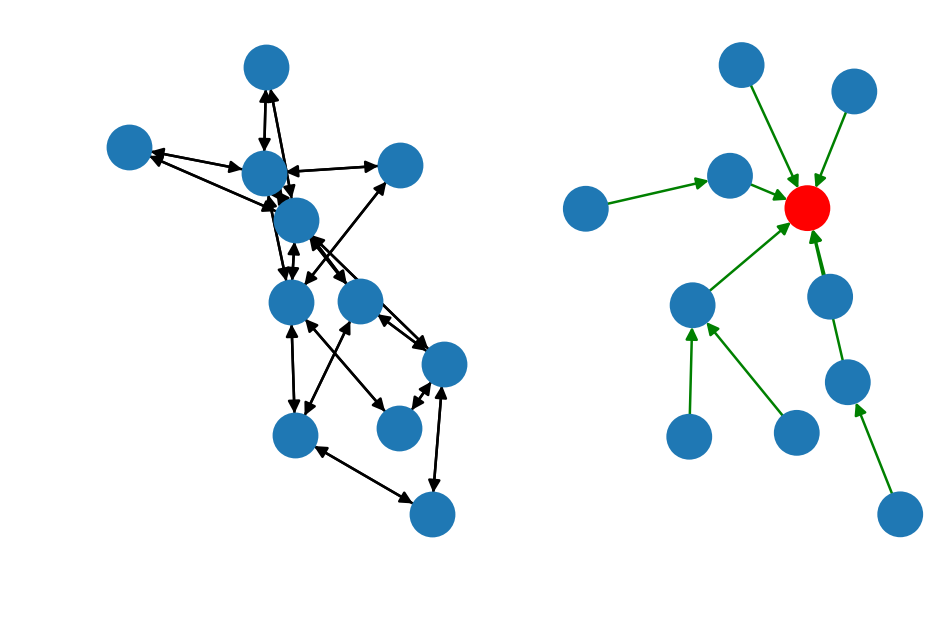

Features from Input
For Nodes:
{0: array([663., 315.]),
 1: array([220.,  57.]),
 2: array([643., 560.]),
 3: array([160., 974.]),
 4: array([224., 711.]),
 5: array([142., 501.]),
 6: array([422., 185.]),
 7: array([918., 968.]),
 8: array([282., 192.]),
 9: array([880., 233.]),
 10: array([597., 596.])}
For Edges:
[((0, 1), array([512.65])),
 ((0, 2), array([245.81])),
 ((0, 3), array([829.03])),
 ((0, 4), array([591.22])),
 ((0, 5), array([553.21])),
 ((0, 7), array([701.02])),
 ((1, 0), array([512.65])),
 ((1, 2), array([657.22])),
 ((2, 0), array([245.81])),
 ((2, 1), array([657.22])),
 ((2, 3), array([636.15])),
 ((2, 5), array([504.46])),
 ((2, 7), array([492.03])),
 ((2, 10), array([58.41])),
 ((3, 2), array([636.15])),
 ((3, 0), array([829.03])),
 ((3, 4), array([270.68])),
 ((3, 6), array([831.36])),
 ((4, 0), array([591.22])),
 ((4, 3), array([270.68])),
 ((4, 8), array([522.23])),
 ((4, 9), array([811.68])),
 ((5, 0), array([553.21])),
 ((5, 2), array([504.46])),
 ((5, 6), 

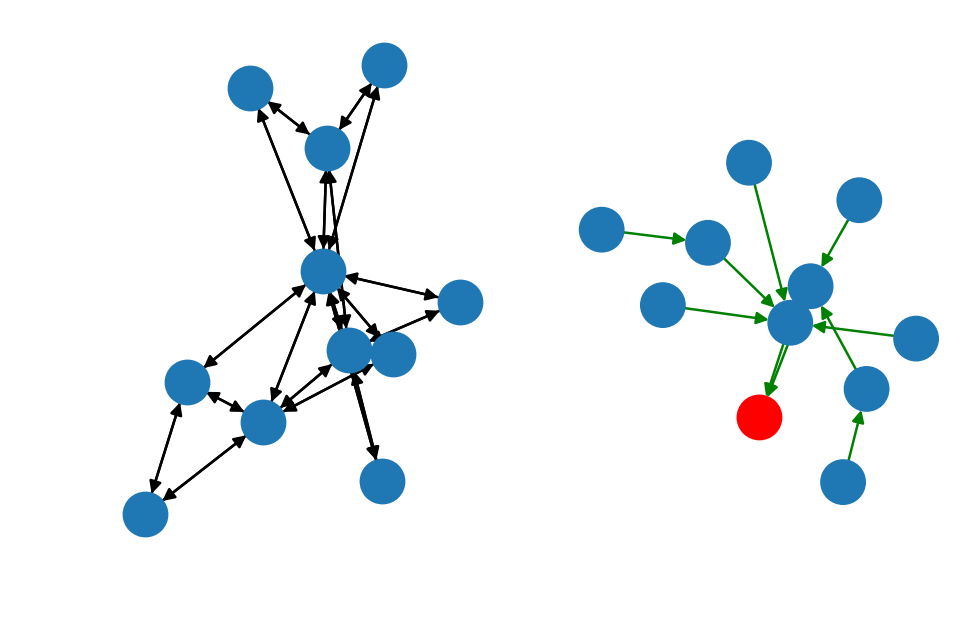

Features from Input
For Nodes:
{0: array([577., 385.]),
 1: array([860., 329.]),
 2: array([851., 656.]),
 3: array([218.,  87.]),
 4: array([958.,  84.]),
 5: array([357., 364.]),
 6: array([340., 488.]),
 7: array([819., 940.]),
 8: array([763., 432.]),
 9: array([547., 764.]),
 10: array([759., 637.])}
For Edges:
[((0, 1), array([288.49])),
 ((0, 2), array([385.38])),
 ((0, 3), array([466.57])),
 ((0, 4), array([485.55])),
 ((0, 9), array([380.19])),
 ((1, 0), array([288.49])),
 ((1, 2), array([327.12])),
 ((1, 3), array([686.1])),
 ((1, 4), array([263.87])),
 ((1, 5), array([504.22])),
 ((1, 6), array([543.77])),
 ((1, 7), array([612.37])),
 ((1, 8), array([141.48])),
 ((1, 9), array([535.9])),
 ((2, 0), array([385.38])),
 ((2, 1), array([327.12])),
 ((2, 5), array([573.85])),
 ((2, 7), array([285.8])),
 ((3, 0), array([466.57])),
 ((3, 1), array([686.1])),
 ((4, 1), array([263.87])),
 ((4, 0), array([485.55])),
 ((4, 6), array([738.34])),
 ((4, 8), array([398.91])),
 ((4, 10), arr

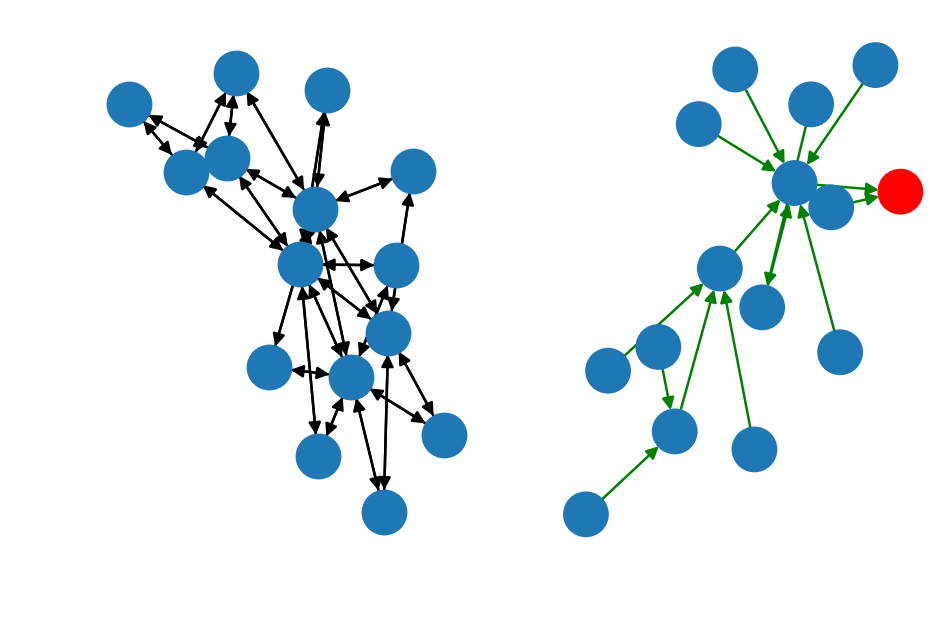

Features from Input
For Nodes:
{0: array([203., 832.]),
 1: array([526., 564.]),
 2: array([786., 303.]),
 3: array([766., 324.]),
 4: array([88., 47.]),
 5: array([562., 120.]),
 6: array([868., 178.]),
 7: array([165.,  22.]),
 8: array([ 84., 671.]),
 9: array([961.,  26.]),
 10: array([ 51., 831.]),
 11: array([541., 179.]),
 12: array([651., 390.]),
 13: array([466., 755.]),
 14: array([286., 193.])}
For Edges:
[((0, 1), array([419.71])),
 ((0, 2), array([787.23])),
 ((0, 3), array([758.31])),
 ((0, 5), array([797.39])),
 ((0, 6), array([932.71])),
 ((0, 7), array([810.89])),
 ((0, 9), array([1106.44])),
 ((0, 10), array([152.])),
 ((1, 0), array([419.71])),
 ((1, 2), array([368.4])),
 ((2, 0), array([787.23])),
 ((2, 1), array([368.4])),
 ((2, 3), array([29.])),
 ((2, 4), array([743.46])),
 ((2, 5), array([289.25])),
 ((2, 6), array([149.5])),
 ((2, 8), array([792.61])),
 ((2, 13), array([553.81])),
 ((3, 2), array([29.])),
 ((3, 0), array([758.31])),
 ((3, 4), array([732.4])),
 

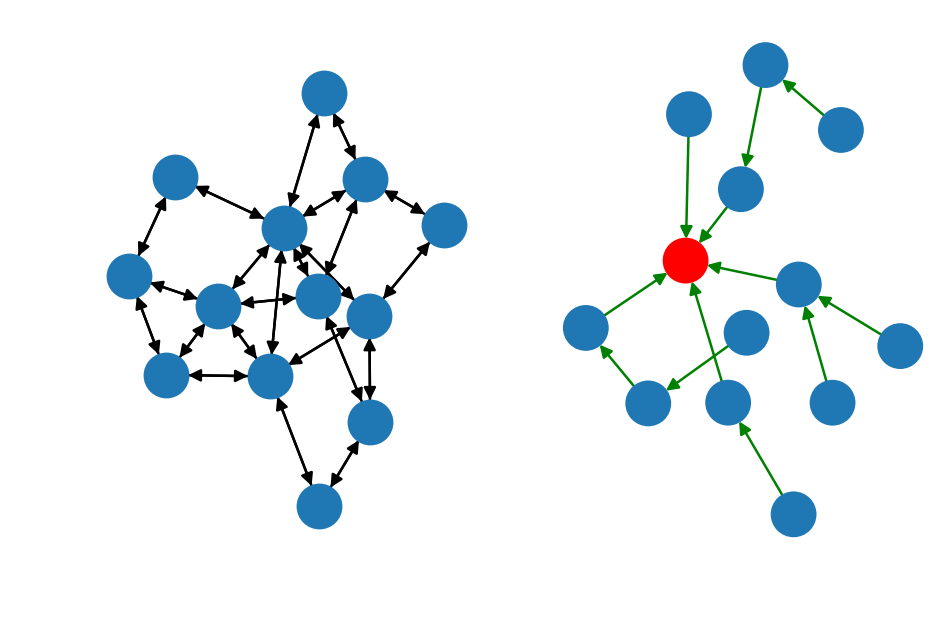

Features from Input
For Nodes:
{0: array([446., 283.]),
 1: array([876., 451.]),
 2: array([203.,  10.]),
 3: array([787.,  59.]),
 4: array([576., 547.]),
 5: array([134., 618.]),
 6: array([627., 999.]),
 7: array([707., 174.]),
 8: array([773., 385.]),
 9: array([957., 668.]),
 10: array([689., 258.]),
 11: array([812., 402.]),
 12: array([897., 896.])}
For Edges:
[((0, 1), array([461.65])),
 ((0, 2), array([365.48])),
 ((0, 3), array([407.99])),
 ((0, 4), array([294.27])),
 ((0, 8), array([342.54])),
 ((1, 0), array([461.65])),
 ((1, 2), array([804.62])),
 ((1, 3), array([401.98])),
 ((1, 5), array([760.56])),
 ((1, 6), array([601.92])),
 ((1, 9), array([231.62])),
 ((1, 12), array([445.5])),
 ((2, 0), array([365.48])),
 ((2, 1), array([804.62])),
 ((2, 4), array([653.83])),
 ((2, 6), array([1076.06])),
 ((2, 10), array([545.62])),
 ((3, 1), array([401.98])),
 ((3, 0), array([407.99])),
 ((3, 5), array([859.59])),
 ((3, 7), array([140.09])),
 ((4, 0), array([294.27])),
 ((4, 2), ar

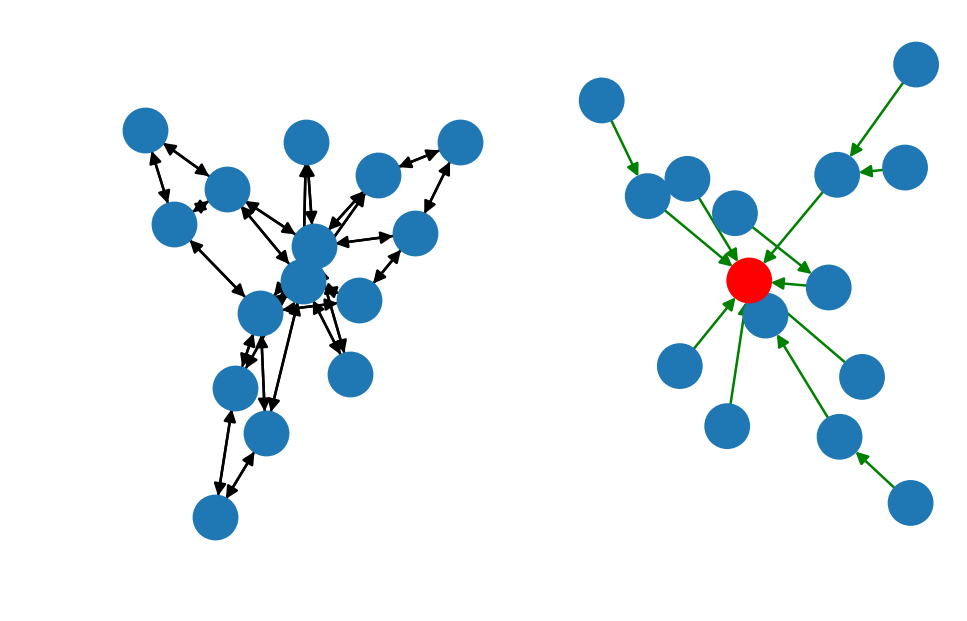

Features from Input
For Nodes:
{0: array([736., 104.]),
 1: array([239., 538.]),
 2: array([749.,  38.]),
 3: array([557., 775.]),
 4: array([176., 264.]),
 5: array([850., 363.]),
 6: array([692., 911.]),
 7: array([472., 404.]),
 8: array([815., 927.]),
 9: array([822., 716.]),
 10: array([925., 468.]),
 11: array([722., 433.]),
 12: array([261., 878.]),
 13: array([881., 772.]),
 14: array([152., 388.])}
For Edges:
[((0, 1), array([659.82])),
 ((0, 2), array([67.27])),
 ((0, 3), array([694.47])),
 ((0, 4), array([582.41])),
 ((0, 6), array([808.2])),
 ((0, 7), array([399.62])),
 ((0, 8), array([826.78])),
 ((0, 13), array([683.56])),
 ((1, 0), array([659.82])),
 ((1, 2), array([714.21])),
 ((1, 3), array([396.6])),
 ((1, 4), array([281.15])),
 ((1, 5), array([635.57])),
 ((1, 9), array([609.57])),
 ((2, 0), array([67.27])),
 ((2, 1), array([714.21])),
 ((2, 14), array([692.03])),
 ((3, 0), array([694.47])),
 ((3, 1), array([396.6])),
 ((3, 11), array([379.72])),
 ((4, 1), array([281

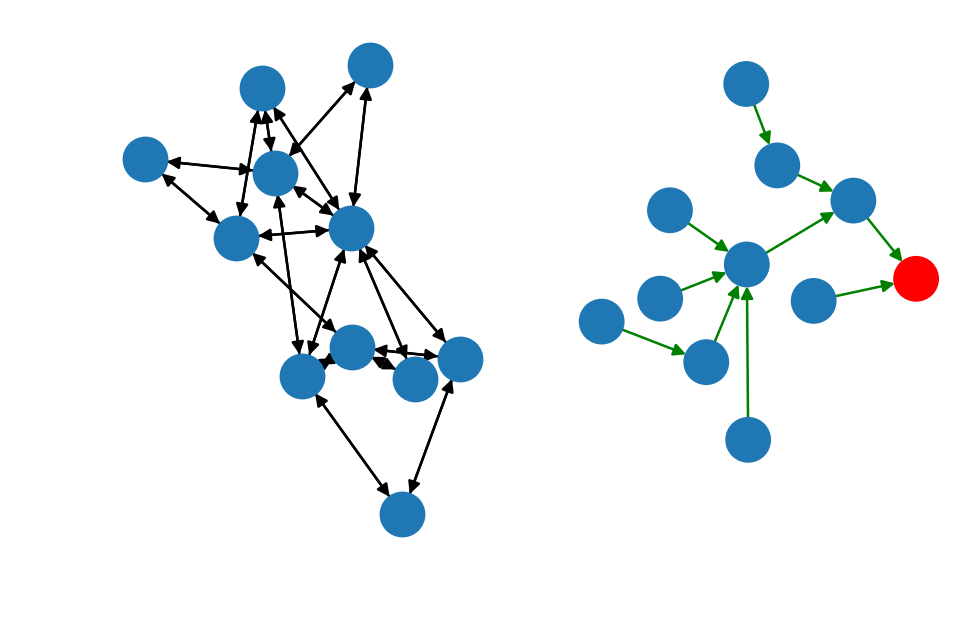

Features from Input
For Nodes:
{0: array([515., 780.]),
 1: array([251., 600.]),
 2: array([194., 696.]),
 3: array([178., 634.]),
 4: array([145., 848.]),
 5: array([ 50., 435.]),
 6: array([672., 328.]),
 7: array([901.,  54.]),
 8: array([717., 698.]),
 9: array([225.,  84.]),
 10: array([163.,   1.])}
For Edges:
[((0, 1), array([319.52])),
 ((0, 2), array([331.81])),
 ((0, 6), array([478.49])),
 ((0, 10), array([854.84])),
 ((1, 0), array([319.52])),
 ((1, 2), array([111.65])),
 ((1, 3), array([80.53])),
 ((1, 5), array([260.05])),
 ((1, 7), array([848.89])),
 ((2, 0), array([331.81])),
 ((2, 1), array([111.65])),
 ((2, 3), array([64.03])),
 ((2, 4), array([159.7])),
 ((2, 7), array([954.99])),
 ((2, 8), array([523.])),
 ((2, 9), array([612.78])),
 ((3, 1), array([80.53])),
 ((3, 2), array([64.03])),
 ((3, 4), array([216.53])),
 ((4, 2), array([159.7])),
 ((4, 3), array([216.53])),
 ((4, 5), array([423.79])),
 ((4, 6), array([740.36])),
 ((5, 4), array([423.79])),
 ((5, 1), array([

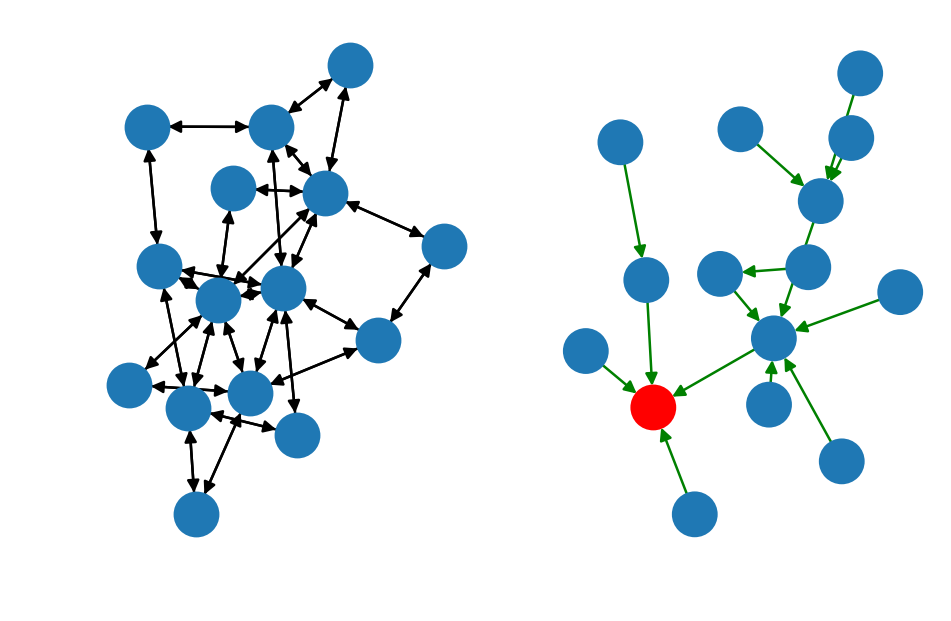

Features from Input
For Nodes:
{0: array([452., 784.]),
 1: array([871.,  95.]),
 2: array([284., 289.]),
 3: array([ 86., 820.]),
 4: array([693., 727.]),
 5: array([154., 604.]),
 6: array([277., 902.]),
 7: array([231., 502.]),
 8: array([251., 335.]),
 9: array([947., 381.]),
 10: array([963., 312.]),
 11: array([967., 245.]),
 12: array([678., 776.]),
 13: array([819., 917.]),
 14: array([786., 385.])}
For Edges:
[((0, 1), array([806.4])),
 ((0, 2), array([522.73])),
 ((0, 4), array([247.65])),
 ((0, 7), array([358.28])),
 ((0, 12), array([226.14])),
 ((0, 14), array([520.34])),
 ((1, 0), array([806.4])),
 ((1, 2), array([618.23])),
 ((1, 3), array([1068.57])),
 ((1, 4), array([656.59])),
 ((1, 6), array([1002.04])),
 ((1, 9), array([295.93])),
 ((1, 11), array([178.09])),
 ((2, 0), array([522.73])),
 ((2, 1), array([618.23])),
 ((2, 3), array([566.71])),
 ((2, 5), array([340.77])),
 ((2, 6), array([613.04])),
 ((2, 12), array([626.42])),
 ((2, 13), array([824.99])),
 ((3, 2), arr

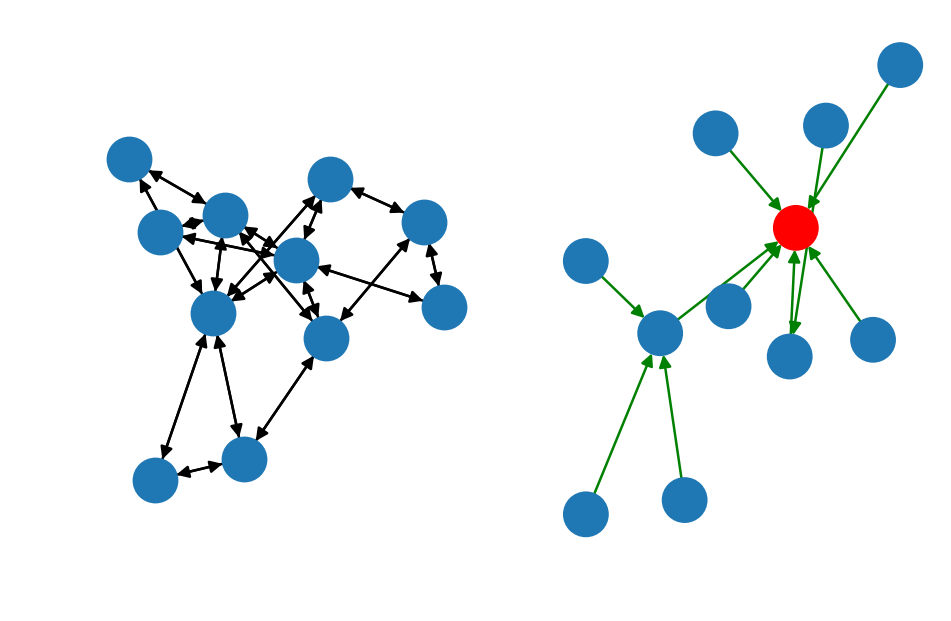

Features from Input
For Nodes:
{0: array([835., 191.]),
 1: array([371., 302.]),
 2: array([972., 721.]),
 3: array([540., 635.]),
 4: array([570., 735.]),
 5: array([373., 318.]),
 6: array([ 25., 902.]),
 7: array([237., 374.]),
 8: array([928., 318.]),
 9: array([247., 199.]),
 10: array([702., 630.])}
For Edges:
[((0, 1), array([477.09])),
 ((0, 2), array([547.42])),
 ((0, 3), array([533.07])),
 ((0, 4), array([605.11])),
 ((0, 6), array([1077.79])),
 ((0, 8), array([157.41])),
 ((1, 0), array([477.09])),
 ((1, 2), array([732.64])),
 ((1, 3), array([373.43])),
 ((1, 7), array([152.12])),
 ((1, 9), array([161.2])),
 ((1, 10), array([465.99])),
 ((2, 0), array([547.42])),
 ((2, 1), array([732.64])),
 ((2, 5), array([721.95])),
 ((3, 1), array([373.43])),
 ((3, 0), array([533.07])),
 ((3, 4), array([104.4])),
 ((3, 7), array([399.91])),
 ((3, 8), array([501.03])),
 ((4, 3), array([104.4])),
 ((4, 0), array([605.11])),
 ((4, 5), array([461.19])),
 ((4, 9), array([625.8])),
 ((5, 4), ar

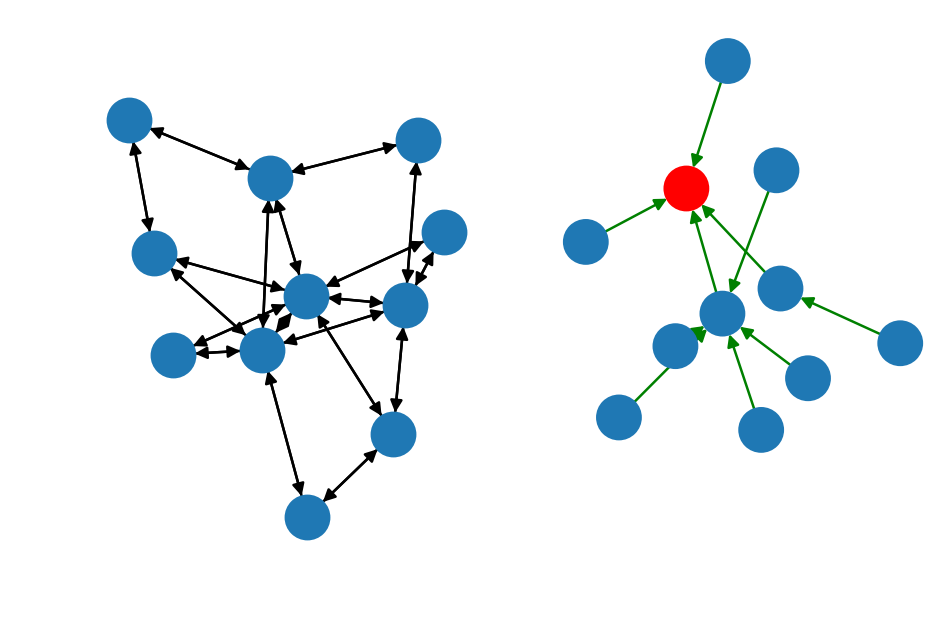

Features from Input
For Nodes:
{0: array([428., 936.]),
 1: array([288., 366.]),
 2: array([810., 403.]),
 3: array([124., 724.]),
 4: array([917., 906.]),
 5: array([907., 729.]),
 6: array([605., 764.]),
 7: array([329., 987.]),
 8: array([598., 481.]),
 9: array([865., 295.]),
 10: array([680., 189.])}
For Edges:
[((0, 1), array([586.94])),
 ((0, 2), array([655.75])),
 ((0, 3), array([370.62])),
 ((0, 4), array([489.92])),
 ((0, 5), array([521.81])),
 ((0, 6), array([246.81])),
 ((0, 7), array([111.36])),
 ((1, 0), array([586.94])),
 ((1, 2), array([523.31])),
 ((1, 3), array([393.78])),
 ((1, 4), array([829.])),
 ((1, 6), array([508.82])),
 ((1, 9), array([581.35])),
 ((2, 0), array([655.75])),
 ((2, 1), array([523.31])),
 ((3, 1), array([393.78])),
 ((3, 0), array([370.62])),
 ((3, 5), array([783.02])),
 ((3, 7), array([333.46])),
 ((3, 10), array([771.6])),
 ((4, 1), array([829.])),
 ((4, 0), array([489.92])),
 ((4, 8), array([531.4])),
 ((5, 3), array([783.02])),
 ((5, 0), array

In [5]:
for in_batch, tg_batch in batch_generator:
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        pos = list(dict(tg_graph.nodes(data="pos")).values())
        target_node = tg_graph.graph['features']
        edge_solution = [f[2] for f in tg_graph.edges(data="solution")]
        
        edges_to_plot = []
        for e, s in zip(tg_graph.edges(), edge_solution):
            if s:
                edges_to_plot.append(e)
        
        nodes_color = []
        for ip in dict(tg_graph.nodes(data="pos")).values():
            if np.all(ip == target_node):
                nodes_color.append("red")
            else:
                nodes_color.append("#1f78b4")
        
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=180)
        nx.draw(
            in_graph,
            ax=ax1,
            #pos=pos
        )
        nx.draw(
            tg_graph,
            ax=ax2,
            #pos=pos,
            edgelist=edges_to_plot,
            node_color=nodes_color,
            edge_color=["green"] * len(edges_to_plot)
        )
        plt.show()
        plt.close()
        
        print("Features from Input")
        print("For Nodes:")
        pprint(dict(in_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in in_graph.edges(data="features")])
        
        print("\nFeatures from Target")
        print("For Nodes:")
        pprint(dict(tg_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in tg_graph.edges(data="features")])
    break